In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
# plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 적용 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14                 # 폰트 크기
plt.rcParams['figure.figsize'] = (13, 8)       # figsize 를 전역으로 설정
plt.rcParams['axes.unicode_minus'] = False     # -(마이너스) 표기 가능하도록 함

# 데이터 로딩

In [3]:
data = pd.read_csv('Global YouTube Statistics2.csv')

#### (kaggle 에서 가이드 한) 분석 주제들 

- YouTube Analytics: Gain valuable insights into the success factors of top YouTube channels and understand what sets them apart from the rest.
- Content Strategy: Discover the most popular categories and upload frequencies that resonate with audiences.
- Regional Influencers: Identify influential YouTube creators from different countries and analyze their impact on a global scale.
- Earnings Analysis: Explore the correlation between channel performance and estimated earnings.
- Geospatial Visualization: Visualize the distribution of successful YouTube channels on a world map and uncover geographical trends.
- Trending Topics: Investigate how certain categories gain popularity over time and correlate with world events.

# EDA

## 1.YouTube 분석

상위권 유튜브 채널의 성공 요인에 대한 가치 있는 통찰력을 얻고 다른 채널과 차별화되는 점을 이해하십시오.

### 상관관계 검토

In [4]:
def triangle_heatmap(corr, square=True, annot=True, cmap='RdYlBu'):
    # 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, square=square, annot=annot, linewidths=0.5,
                mask=mask,                 # 표시하지 않을 마스크
                cmap=cmap,                 # Red, Yellow, Blue 색상으로 표시
                vmin = -1,vmax = 1,        # 컬러바 범위
                cbar_kws={"shrink": .5},   # 컬러바 크기
               )

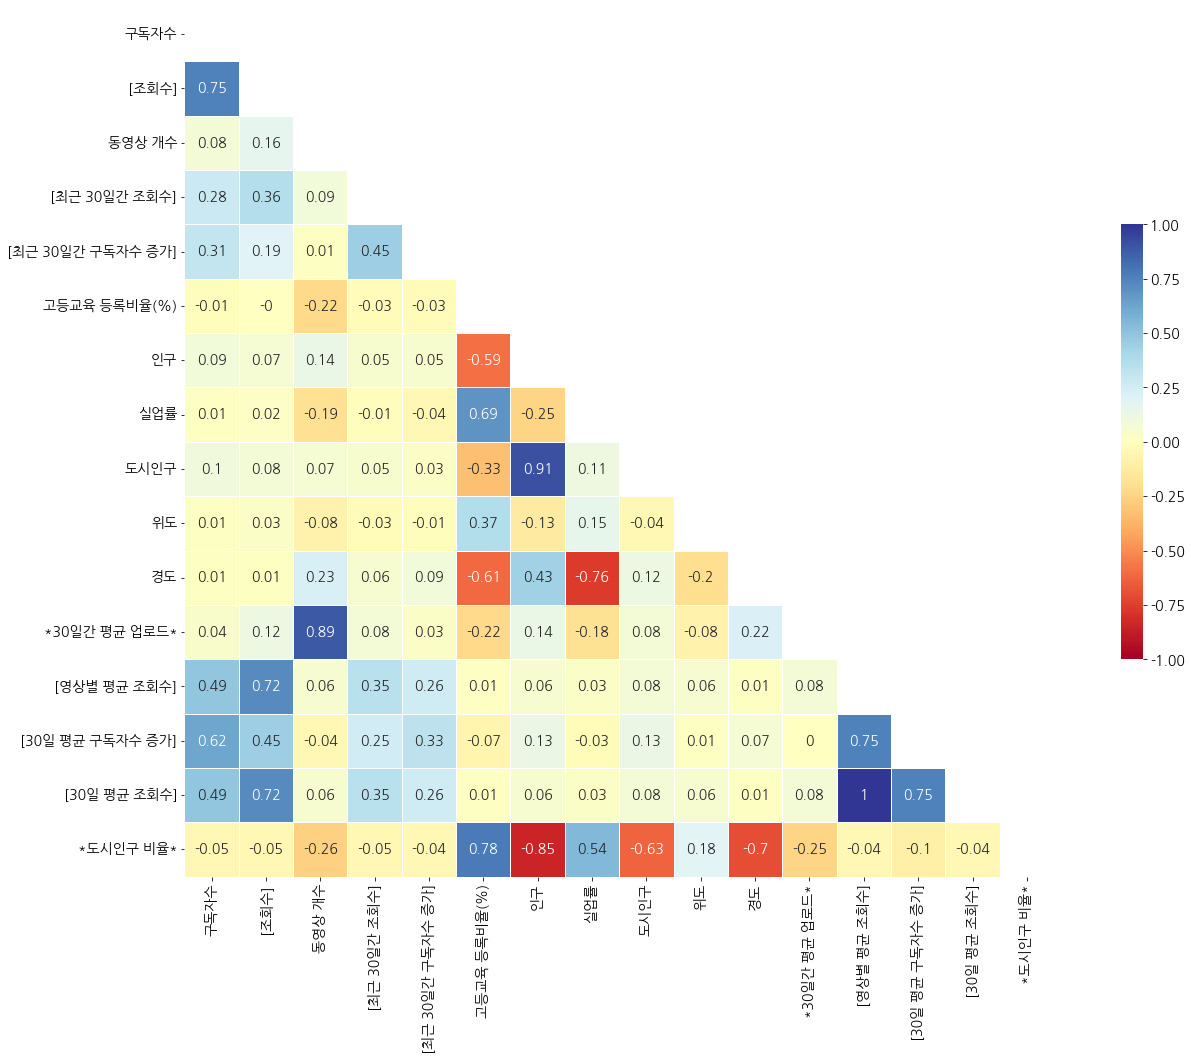

In [5]:
data['[30일 평균 구독자수 증가]'] = data['구독자수'] / data['*유지년수*'] / 12
data['[30일 평균 조회수]'] = data['조회수'] / data['*유지년수*'] / 12
data['*도시인구 비율*'] = data['도시인구'] / data['인구']

# data2 = data[['구독자 수', '조회수', '동영상 개수', '30일간 평균 업로드',
#                   '최근 30일간 조회수', '최근 30일간 구독자 수 증가', '영상별 평균 조회수',
#                  '고등교육 등록비율(%)', '실업률', '생성날짜', '도시인구 비율']]
data2 = data.drop(columns=[
    '구독자 순위', '채널명', '분류', '제목', '나라', '국가코드',
    '조회수 순위', '국가별 구독자 순위', '채널 타입별 순위',
    '최소 월수익', '최대 월수익', '최소 연수익', '최대 연수익',
    '생성날짜', '*유지년수*'
])
data2 = data2.rename(columns = {
    '구독자 수':'[구독자 수]', '조회수':'[조회수]',
    '최근 30일간 조회수':'[최근 30일간 조회수]',
    '최근 30일간 구독자수 증가':'[최근 30일간 구독자수 증가]',
    '영상별 평균 조회수': '[영상별 평균 조회수]'
})

plt.figure(figsize=(24, 16))
triangle_heatmap(data2.corr().round(2))
plt.show()

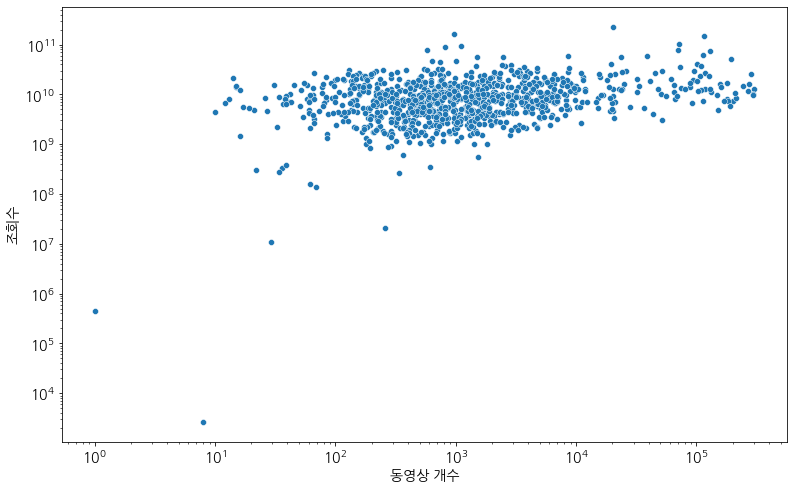

In [6]:
x = '동영상 개수'
y = '조회수'
sns.scatterplot(data, x=x, y=y)
plt.loglog()
plt.show()

- 동영상 업로드를 많이 하는 것은 총 [조회수]를 늘리는데 일부 도움이 될 수 있다.

In [7]:
total = data['구독자수'].sum()
data['구독자 비율(%)'] = round(data['구독자수'] / 8000000000 * 100, 1)

mask = data['동영상 개수'] > 1
columns = ['채널명', '나라', '분류', '구독자수']
influence = data.loc[mask, columns]
influence = influence.reset_index(drop=True).head(15)
influence

,채널명,나라,분류,구독자수
0,T-Series,India,Music,245000000
1,MrBeast,United States,Entertainment,166000000
2,Cocomelon - Nursery Rhymes,United States,Education,162000000
3,SET India,India,Shows,159000000
4,✿ Kids Diana Show,United States,People & Blogs,112000000
5,PewDiePie,Japan,Gaming,111000000
6,Like Nastya,United States,People & Blogs,106000000
7,Vlad and Niki,United States,Entertainment,98900000
8,Zee Music Company,India,Music,96700000
9,WWE,United States,Sports,96000000


Q. 상위권 유튜브 채널의 성공 요인에 대한 가치 있는 통찰력을 얻고 다른 채널과 차별화되는 점을 이해하십시오.

A. 
- 인기에 도움이 되는 특정 요인(수치형 데이터)이 따로 있지 않다.
       - 동영상 개수 (상관관계 0.16) 정도만 일부 영향을 미친다
- 분류 항목 기준으로 Entertainment, Music 이 1, 2위 이다.

    - 즉, 내용이 중요
    - 유튜브 채널은 재미있거나 필요한/원하는 컨텐츠이어야 한다.

- 음악은 세계 공통언어 이다.
    - [달콤한 사이언스] ‘음악은 세계공통어’ 과학적 근거 찾았다
    - https://www.seoul.co.kr/news/newsView.php?id=20191125500084
    - BLACKPINK, BANGTANTV 채널은 구독자 수가 한국의 5100만 인구를 상회한다.
       (즉, 세계적인 채널)
    
- 같은 문화(국가)권(인도), 같은 언어권(영어)의 인구가 많을 수록 유리하다.
    - SET India, Goldmines (인도 문화)
    
    - 상위권의 상당수 채널이 영어를 사용
    - PewDiePie 채널의 국가는 Japan이지만, 채널에 들어가 보면 서양인이 영어를 사용하는 채널
- 다양한 국가의 언어로 더빙을 하는 것도 인기의 주요 비결이다
    - MrBeast (한국어로도 더빙이 되어있어서 한국에서도 잘 알려짐)
    - 


#### 메모리 청소

In [8]:
import gc # garbage collector : 필요없는 메모리를 다시 가져옴.
gc.collect()

20100